<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/Tokenization_stop_words_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
import re

In [3]:
# You should download the NLTK data once.
# It can be a bit time consuming.
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
sentence=" Don't be fooled by the dark sounding name, Mr. Jone's  Orphanage is as cheery goes for a past"

**word tokenize**  separated Don't into Do n't , but Jone's  into Jone and 's

In [5]:
from nltk.tokenize import word_tokenize
print(word_tokenize(sentence))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'past']


In [6]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(sentence))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'past']


In [7]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence(sentence))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'past']


In [8]:
sentence = re.sub(r"that's","that is",sentence)
sentence = re.sub(r"there's","there is",sentence)
sentence = re.sub(r"what's","what is",sentence)
sentence = re.sub(r"where's","where is",sentence)
sentence = re.sub(r"it's","it is",sentence)
sentence = re.sub(r"who's","who is",sentence)
sentence = re.sub(r"i'm","i am",sentence)
sentence = re.sub(r"she's","she is",sentence)
sentence = re.sub(r"he's","he is",sentence)
sentence = re.sub(r"they're","they are",sentence)
sentence = re.sub(r"who're","who are",sentence)
sentence = re.sub(r"ain't","am not",sentence)
sentence = re.sub(r"wouldn't","would not",sentence)
sentence = re.sub(r"shouldn't","should not",sentence)
sentence = re.sub(r"can't","can not",sentence)
sentence = re.sub(r"couldn't","could not",sentence)
sentence = re.sub(r"won't","will not",sentence)
sentence = re.sub(r"don't","do not",sentence)
sentence = re.sub(r"didn't","did not",sentence)

# Integer encoding

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
sentences=[['barber', 'person'],
           ['barber', 'good', 'person'], 
           ['barber', 'huge', 'person'],
           ['knew', 'secret'],
           ['secret', 'kept', 'huge', 'secret'],
           ['huge', 'secret'], 
           ['barber', 'kept', 'word'],
           ['barber', 'kept', 'word'],
           ['barber', 'kept', 'secret'],
           ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'],
           ['barber', 'went', 'huge', 'mountain']]

In [10]:
tokenizer = Tokenizer( oov_token=100)
tokenizer.fit_on_texts(sentences) 
# When putting corpus in fit_on_texts(), it is possible to generate the group of words based on frequency.

In [11]:
print(tokenizer.word_index)

{100: 1, 'barber': 2, 'secret': 3, 'huge': 4, 'kept': 5, 'person': 6, 'word': 7, 'keeping': 8, 'good': 9, 'knew': 10, 'driving': 11, 'crazy': 12, 'went': 13, 'mountain': 14}


In [12]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [13]:
example =['student', 'don"t' ,'like ']

In [14]:
tokenizer.texts_to_sequences(
    example
)

[[1], [1, 1], [1]]

# Stop Words

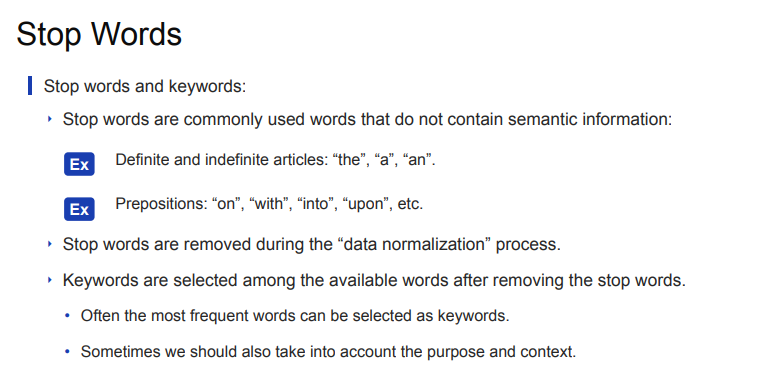

In [15]:
from nltk.corpus import stopwords
len(stopwords.words('english'))

179

In [16]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
example = "Family is not an important thing. It's everything".lower()
example = re.sub(r"it's","it is",example)

stop_words= set(stopwords.words('english'))
word_tokens= text_to_word_sequence(example)
word_tokens

['family', 'is', 'not', 'an', 'important', 'thing', 'it', 'is', 'everything']

In [17]:
result = []
for w in word_tokens:
  if w not in stop_words:
    result.append(w)

print(word_tokens)
print(result)

['family', 'is', 'not', 'an', 'important', 'thing', 'it', 'is', 'everything']
['family', 'important', 'thing', 'everything']
